# Prove ML per tesi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Si parte dal precedente progetto "Elaborazione del segnale EEG con metodi supervisionati per la classificazione dei pazienti di Alzheimer". Si individuano alcuni dei classificaori utilizzati, per eseguerire k-fold cross validation unita alla greadsearchCV per individuare gli iperparametri ottimali con i quali addestrare i classificatori e alla fine eseguire i modelli.

Si esegue l'import delle principali librerie utilizzate per il progetto di machine learning

In [ ]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
from scipy.fftpack import fft, ifft, fftfreq,rfft
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, \
    recall_score, \
    accuracy_score, f1_score

# Lets import some modules for basic computation
import time


import pickle

# Some modules for plotting and visualizing
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display

# And some Machine Learning modules from scikit-learn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GroupKFold

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import KernelPCA

In [ ]:
!python --version

Python 3.7.12


## Principali funzioni di utilità

In [ ]:
def tuning_albero_decisione(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_traina=X_train_caso1
       y_traina=y_train_caso1
       X_testa=X_test_caso1
       y_testa=y_test_caso1
    if caso==2:
       X_traina=X_train_caso2
       y_traina=y_train_caso2
       X_testa=X_test_caso2
       y_testa=y_test_caso2
    if caso==3:
       X_traina=X_train_caso3
       y_traina=y_train_caso3  
       X_testa=X_test_caso3
       y_testa=y_test_caso3   
    if caso==4:
       X_traina=X_train_caso4
       y_traina=y_train_caso4   
       X_testa=X_test_caso4
       y_testa=y_test_caso4
    if caso==5:
       X_traina=X_train_caso5
       y_traina=y_train_caso5   
       X_testa=X_test_caso5
       y_testa=y_test_caso5   

    print ("stimatore utilizzato - DecisionTreeClassifier")
    parametri1 = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10]}

    parametri = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10],
              "min_samples_leaf":[1,2,3],
              "min_samples_split":[1,2,3],
              "min_weight_fraction_leaf":[0,1,2]
              }

    cercap = GridSearchCV(estimator=DecisionTreeClassifier(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    gs = cercap.fit(X_traina, y_traina)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
  
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testa, y_testa))

    y_true, y_pred = y_testa , clf.predict(X_testa)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testa,y_pred))
    matrice=confusion_matrix(y_testa,y_pred)
        #print(y_test,y_pred)
    if caso !=5:
        tp=matrice[0,0]
        fn=matrice[0,1]
        fp=matrice[1,0]
        tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
        accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
        precision=int((tp/(tp+fp))*100)
        sensitivity=int((tp/(tp+fn))*100)
        specificity=int((tn/(tn+fp))*100)
        if (precision== 0 and sensitivity==0):
            f1score=0
        else:
            f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))
 
        print('Accuratezza Test: %.3f' % accurancy)  
        print('Precisione  Test: %.3f' % precision)
        print('Sensitività Test: %.3f' % sensitivity)
        print('Specificità Test: %.3f' % specificity)
        print('F1 score    Test: %.3f' % f1score)
    #print(classification_report(y_test,y_pred,target_names=target_names))

In [ ]:
def tuning_albero_decisione_CV(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_traina=X_train_caso1
       y_traina=y_train_caso1
       X_testa=X_test_caso1
       y_testa=y_test_caso1
    if caso==2:
       X_traina=X_train_caso2
       y_traina=y_train_caso2
       X_testa=X_test_caso2
       y_testa=y_test_caso2
    if caso==3:
       X_traina=X_train_caso3
       y_traina=y_train_caso3  
       X_testa=X_test_caso3
       y_testa=y_test_caso3   
    if caso==4:
       X_traina=X_train_caso4
       y_traina=y_train_caso4   
       X_testa=X_test_caso4
       y_testa=y_test_caso4 
    if caso==5:
       X_traina=X_train_caso5
       y_traina=y_train_caso5   
       X_testa=X_test_caso5
       y_testa=y_test_caso5

    parametri1 = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10]}

    parametri = {"criterion":["gini","entropy"],
              "max_depth": [3,4,5,10],
              "min_samples_leaf":[1,2,3],
              "min_samples_split":[1,2,3],
              "min_weight_fraction_leaf":[0,1,2]}

    cercap = GridSearchCV(estimator=DecisionTreeClassifier(random_state=0), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=2,
                  verbose=1,
                  n_jobs=-1)
    gs = cercap.fit(X_traina, y_traina)
    print(gs.best_score_)
    print(gs.best_params_)


             
    
   

    scores = cross_val_score(gs, X_traina, y_traina, 
                         scoring='accuracy', cv=ncv)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    #questa parte non viene eseguita in quanto  è stato già eseguita avendo imnpostato refit=True.
   
  
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testa, y_testa))

    y_true, y_pred = y_testa , clf.predict(X_testa)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))
    print('Test accuracy: %.3f' % clf.score(X_testa, y_testa))

    print(confusion_matrix(y_testa,y_pred))
    matrice=confusion_matrix(y_testa,y_pred)

In [ ]:
def tuning_SVM(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trains=X_train_caso1
       y_trains=y_train_caso1
       X_tests=X_test_caso1
       y_tests=y_test_caso1
    if caso==2:
       X_trains=X_train_caso2
       y_trains=y_train_caso2
       X_tests=X_test_caso2
       y_tests=y_test_caso2
    if caso==3:
       X_trains=X_train_caso3
       y_trains=y_train_caso3  
       X_tests=X_test_caso3
       y_tests=y_test_caso3   
    if caso==4:
       X_trains=X_train_caso4
       y_trains=y_train_caso4   
       X_tests=X_test_caso4
       y_tests=y_test_caso4
    if caso==5:
       X_trains=X_train_caso5
       y_trains=y_train_caso5   
       X_tests=X_test_caso5
       y_tests=y_test_caso5       

    print ("stimatore utilizzato - Support vector machine (SVC)")
    parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'kernel': ['linear','rbf']}

    parametri1 = {'kernel': ['linear','rbf']}

    #cercap = GridSearchCV(estimator=SVC(), 
    #              param_grid=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_jobs=-1)
    cercap = RandomizedSearchCV(estimator=SVC(), 
                  param_distributions=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_iter=20,
                  n_jobs=-1)
    gs = cercap.fit(X_trains, y_trains)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    # note that we do not need to refit the classifier
    # because this is done automatically via refit=True.
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_tests, y_tests))

    y_true, y_pred = y_tests , clf.predict(X_tests)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_tests,y_pred))
    matrice=confusion_matrix(y_tests,y_pred)
        #print(y_test,y_pred)
    if caso !=5:
        tp=matrice[0,0]
        fn=matrice[0,1]
        fp=matrice[1,0]
        tn=matrice[1,1]
            
            #print(tp,fp,fn,tn)
        accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
        precision=int((tp/(tp+fp))*100)
        sensitivity=int((tp/(tp+fn))*100)
        specificity=int((tn/(tn+fp))*100)
        if (precision== 0 and sensitivity==0):
            f1score=0
        else:
            f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

        print('Accuratezza Test: %.3f' % accurancy)  
        print('Precisione  Test: %.3f' % precision)
        print('Sensitività Test: %.3f' % sensitivity)
        print('Specificità Test: %.3f' % specificity)
        print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_SVM_1(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trains=X_train_caso1
       y_trains=y_train_caso1
       X_tests=X_test_caso1
       y_tests=y_test_caso1
    if caso==2:
       X_trains=X_train_caso2
       y_trains=y_train_caso2
       X_tests=X_test_caso2
       y_tests=y_test_caso2
    if caso==3:
       X_trains=X_train_caso3
       y_trains=y_train_caso3  
       X_tests=X_test_caso3
       y_tests=y_test_caso3   
    if caso==4:
       X_trains=X_train_caso4
       y_trains=y_train_caso4   
       X_tests=X_test_caso4
       y_tests=y_test_caso4
    if caso==5:
       X_trains=X_train_caso5
       y_trains=y_train_caso5   
       X_tests=X_test_caso5
       y_tests=y_test_caso5       

    print ("stimatore utilizzato - Support vector machine (SVC)")
    parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'kernel': ['linear','rbf']}

    parametri1 = {'C': [1000.0], 
               'gamma': [0.001], 
               'kernel': ['rbf']}

    cercap = GridSearchCV(estimator=SVC(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    #cercap = RandomizedSearchCV(estimator=SVC(), 
    #              param_distributions=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_iter=20,
    #              n_jobs=-1)
    gs = cercap.fit(X_trains, y_trains)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    # note that we do not need to refit the classifier
    # because this is done automatically via refit=True.
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_tests, y_tests))

    y_true, y_pred = y_tests , clf.predict(X_tests)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_tests,y_pred))
    matrice=confusion_matrix(y_tests,y_pred)
        #print(y_test,y_pred)
    if caso !=5:
        tp=matrice[0,0]
        fn=matrice[0,1]
        fp=matrice[1,0]
        tn=matrice[1,1]
            
            #print(tp,fp,fn,tn)
        accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
        precision=int((tp/(tp+fp))*100)
        sensitivity=int((tp/(tp+fn))*100)
        specificity=int((tn/(tn+fp))*100)
        if (precision== 0 and sensitivity==0):
            f1score=0
        else:
            f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

        print('Accuratezza Test: %.3f' % accurancy)  
        print('Precisione  Test: %.3f' % precision)
        print('Sensitività Test: %.3f' % sensitivity)
        print('Specificità Test: %.3f' % specificity)
        print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_foresta(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_trainf=X_train_caso1
       y_trainf=y_train_caso1
       X_testf=X_test_caso1
       y_testf=y_test_caso1
    if caso==2:
       X_trainf=X_train_caso2
       y_trainf=y_train_caso2
       X_testf=X_test_caso2
       y_testf=y_test_caso2
    if caso==3:
       X_trainf=X_train_caso3
       y_trainf=y_train_caso3  
       X_testf=X_test_caso3
       y_testf=y_test_caso3   
    if caso==4:
       X_trainf=X_train_caso4
       y_trainf=y_train_caso4   
       X_testf=X_test_caso4
       y_testf=y_test_caso4     

     
    parametri = {"max_depth": [8, 12, None],
                 "max_features": [1, 3, 10],
                 "min_samples_split": [1, 3, 10],
                 "min_samples_leaf": [1, 3, 10],
                 "bootstrap": [True, False],
                 "criterion": ["gini", "entropy"],
                 "n_estimators": [20, 40, 80]}
  

    #cercap = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
    #              param_grid=parametri, 
    #              scoring='accuracy', 
    #              refit=True,
    #              cv=ncv,
    #              verbose=1,
    #              n_jobs=-1)
    cercap = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), 
                  param_distributions=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_iter=20,
                  n_jobs=-1)
    
   
    gs = cercap.fit(X_trainf, y_trainf)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testf, y_testf))

    y_true, y_pred = y_testf , clf.predict(X_testf)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testf,y_pred))
    matrice=confusion_matrix(y_testf,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)


In [ ]:
def tuning_SVM_CV(caso,numerocv):
    ncv=numerocv
    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4 
    if caso==5:
       X_train=X_train_caso5
       y_train=y_train_caso5   
       X_test=X_test_caso5
       y_test=y_test_caso5 

    range_valori = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]

    parametri = {'C': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 
               'kernel': ['linear','rbf']}

  

    cercap = GridSearchCV(estimator=SVC(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_train, y_train)
    print(gs.best_score_)
    print(gs.best_params_)


        

    scores = cross_val_score(gs, X_train, y_train, 
                         scoring='accuracy', cv=ncv)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione:: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))

    

    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    #questa parte non viene eseguita in quanto  è stato già eseguita avendo imnpostato refit=True.
   
  
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_test, y_test))

    y_true, y_pred = y_test , clf.predict(X_test)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))
    print('Test accuracy: %.3f' % clf.score(X_test, y_test))

    print(confusion_matrix(y_test,y_pred))
    matrice=confusion_matrix(y_test,y_pred)

In [ ]:
def tuning_KNN(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_traink=X_train_caso1
       y_traink=y_train_caso1
       X_testk=X_test_caso1
       y_testk=y_test_caso1
    if caso==2:
       X_traink=X_train_caso2
       y_traink=y_train_caso2
       X_testk=X_test_caso2
       y_testk=y_test_caso2
    if caso==3:
       X_traink=X_train_caso3
       y_traink=y_train_caso3  
       X_testk=X_test_caso3
       y_testk=y_test_caso3   
    if caso==4:
       X_traink=X_train_caso4
       y_traink=y_train_caso4   
       X_testk=X_test_caso4
       y_testk=y_test_caso4
    if caso==5:
       X_traink=X_train_caso5
       y_traink=y_train_caso5   
       X_testk=X_test_caso5
       y_testk=y_test_caso5        

    print ("stimatore utilizzato - KNeighborsClassifier")   
    parametri = {
             'n_neighbors' : [5, 20],
             'weights': ['uniform', 'distance'],
             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
              }

    cercap = GridSearchCV(estimator=KNeighborsClassifier(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_traink, y_traink)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print(gs.best_params_)


    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testk, y_testk))

    y_true, y_pred = y_testk , clf.predict(X_testk)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testk,y_pred))
    matrice=confusion_matrix(y_testk,y_pred)
        #print(y_test,y_pred)
    if caso !=5:    
        tp=matrice[0,0]
        fn=matrice[0,1]
        fp=matrice[1,0]
        tn=matrice[1,1]
            
            #print(tp,fp,fn,tn)
        accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
        precision=int((tp/(tp+fp))*100)
        sensitivity=int((tp/(tp+fn))*100)
        specificity=int((tn/(tn+fp))*100)
        if (precision== 0 and sensitivity==0):
            f1score=0
        else:
            f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

        print('Accuratezza Test: %.3f' % accurancy)  
        print('Precisione  Test: %.3f' % precision)
        print('Sensitività Test: %.3f' % sensitivity)
        print('Specificità Test: %.3f' % specificity)
        print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_MP(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_trainm=X_train_caso1
       y_trainm=y_train_caso1
       X_testm=X_test_caso1
       y_testm=y_test_caso1
    if caso==2:
       X_trainm=X_train_caso2
       y_trainm=y_train_caso2
       X_testm=X_test_caso2
       y_testm=y_test_caso2
    if caso==3:
       X_trainm=X_train_caso3
       y_trainm=y_train_caso3  
       X_testm=X_test_caso3
       y_testm=y_test_caso3   
    if caso==4:
       X_trainm=X_train_caso4
       y_trainm=y_train_caso4   
       X_testm=X_test_caso4
       y_testm=y_test_caso4     

    parametri = {  'hidden_layer_sizes': [(10,30,10),(20,)],
                    'activation': ['tanh', 'relu'],
                    'solver': ['sgd', 'adam'],
                    'alpha': [0.0001, 0.05, 0.1,1],
                    'learning_rate': ['constant','adaptive']
                  }

    cercap = GridSearchCV(estimator=MLPClassifier(max_iter=100), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_trainm, y_trainm)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print('I migliori parametri trvati sono :\n', gs.best_params_)
    #print(gs.best_params_)

    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    
    
    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testm, y_testm))

    y_true, y_pred = y_testm , clf.predict(X_testm)
    
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testm,y_pred))
    matrice=confusion_matrix(y_testm,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def tuning_LR(caso,numerocv):
    ncv=numerocv

    if caso==1:
       X_trainl=X_train_caso1
       y_trainl=y_train_caso1
       X_testl=X_test_caso1
       y_testl=y_test_caso1
    if caso==2:
       X_trainl=X_train_caso2
       y_trainl=y_train_caso2
       X_testl=X_test_caso2
       y_testl=y_test_caso2
    if caso==3:
       X_trainl=X_train_caso3
       y_trainl=y_train_caso3  
       X_testl=X_test_caso3
       y_testl=y_test_caso3   
    if caso==4:
       X_trainl=X_train_caso4
       y_trainl=y_train_caso4   
       X_testl=X_test_caso4
       y_testl=y_test_caso4     

    
    parametri ={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}

    cercap = GridSearchCV(estimator=LogisticRegression(), 
                  param_grid=parametri, 
                  scoring='accuracy', 
                  refit=True,
                  cv=ncv,
                  verbose=1,
                  n_jobs=-1)
    
    gs = cercap.fit(X_trainl, y_trainl)
    print('Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: %.3f' % gs.best_score_)
    print('I migliori parametri trvati sono :\n', gs.best_params_)
    #print(gs.best_params_)

    means = gs.cv_results_['mean_test_score']
    stds = gs.cv_results_['std_test_score']
    #for mean, std, params in zip(means, stds, gs.cv_results_['params']):
    #    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    
    
    clf = gs.best_estimator_
    # clf.fit(X_train, y_train) 
    
    print('Accuratezza con dati di Test: %.3f' % clf.score(X_testl, y_testl))

    y_true, y_pred = y_testl , clf.predict(X_testl)
    print('Risultato sui dati di test:')
    print(classification_report(y_true, y_pred))

    target_names = ['Positivo','Negativo']
    print(confusion_matrix(y_testl,y_pred))
    matrice=confusion_matrix(y_testl,y_pred)
        #print(y_test,y_pred)
    tp=matrice[0,0]
    fn=matrice[0,1]
    fp=matrice[1,0]
    tn=matrice[1,1]
         
        #print(tp,fp,fn,tn)
    accurancy=int(((tp+tn)/(tn+fp+fn+tp))*100)
    if (fp== 0 and fp==0):
        precision=0
    else:
        precision=int((tp/(tp+fp))*100)
    sensitivity=int((tp/(tp+fn))*100)
    specificity=int((tn/(tn+fp))*100)
    if (precision== 0 and sensitivity==0):
        f1score=0
    else:
        f1score=int(2*((precision * sensitivity)/(precision + sensitivity)))

    print('Accuratezza Test: %.3f' % accurancy)  
    print('Precisione  Test: %.3f' % precision)
    print('Sensitività Test: %.3f' % sensitivity)
    print('Specificità Test: %.3f' % specificity)
    print('F1 score    Test: %.3f' % f1score)

In [ ]:
def validazione_incrociata_kfold(caso,numerocv,modello):
    ncv=numerocv
    if modello==1:
       classificatore=DecisionTreeClassifier()
    if modello==2:
       classificatore=SVC()
       

    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    from sklearn.model_selection import StratifiedKFold
    

    kfold = StratifiedKFold(n_splits=10).split(X_train, y_train)

    scores = []
    for k, (train, test) in enumerate(kfold):
        classificatore.fit(X_train[train], y_train[train])
        score = classificatore.score(X_train[test], y_train[test])
        scores.append(score)
        print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
              np.bincount(y_train[train]), score))
    
    print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:

def validazione_incrociata_score(caso,numerocv,modello):
    ncv=numerocv
    if modello==1:
       classificatore=DecisionTreeClassifier()
    if modello==2:
       classificatore=SVC()
       

    if caso==1:
       X_train=X_train_caso1
       y_train=y_train_caso1
       X_test=X_test_caso1
       y_test=y_test_caso1
    if caso==2:
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    
    scores = cross_val_score(estimator=classificatore,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             n_jobs=1)
    print('CV accuracy scores: %s' % scores)
    print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

In [ ]:
def prepara_dati(caso,pca,split):
    
    
       

    if caso==1:
       df=pca_wa_AD_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_AD_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Control', 1, 0)

    if caso==2:
       df=pca_wa_MCI_AD.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_AD[' class']
       y = Y.to_numpy()
       y = np.where(y == ' AD', 1, 0)
       X_train=X_train_caso2
       y_train=y_train_caso2
       X_test=X_test_caso2
       y_test=y_test_caso2
    if caso==3:
       df=pca_wa_MCI_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' MCI', 1, 0)
       X_train=X_train_caso3
       y_train=y_train_caso3  
       X_test=X_test_caso3
       y_test=y_test_caso3   
    if caso==4:
       df=pca_wa_CASE_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_CASE_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Case', 1, 0)
       X_train=X_train_caso4
       y_train=y_train_caso4   
       X_test=X_test_caso4
       y_test=y_test_caso4     

    
   
    
    pipe_cl = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        classificatore)

    pipe_cl.fit(X_train, y_train)
    y_pred = pipe_cl.predict(X_test)
    print('Test Accuracy: %.3f' % pipe_lr.score(X_test, y_test))

In [ ]:

def exec_trad(caso,modello):
    
    if modello==1:
       classificatore=DecisionTreeClassifier(criterion='gini', max_depth=3)
    if modello==2:
       classificatore=SVC()
       
    if caso==1:
       df=pca_wa_AD_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_AD_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Control', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    if caso==2:
       df=pca_wa_MCI_AD.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_AD[' class']
       y = Y.to_numpy()
       y = np.where(y == ' AD', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
      
    if caso==3:
       df=pca_wa_MCI_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' MCI', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
         
    if caso==4:
       df=pca_wa_CASE_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_CASE_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Case', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
           

    
      
    classificatore.fit(X_train, y_train)
        
    train_score = int((classificatore.score(X_train, y_train))*100)
    test_score = int((classificatore.score(X_test, y_test))*100)
    y_pred = classificatore.predict(X_test)
    test_accurancy=int((accuracy_score(y_test, y_pred))*100)
    print("accurancy test :", test_accurancy)

In [ ]:

def prova_pipeline(caso,modello):
    
    if modello==1:
       classificatore=tree.DecisionTreeClassifier(criterion='gini', max_depth=3)
    if modello==2:
       classificatore=SVC()
       
    if caso==1:
       df=pca_wa_AD_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_AD_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Control', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
    if caso==2:
       df=pca_wa_MCI_AD.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_AD[' class']
       y = Y.to_numpy()
       y = np.where(y == ' AD', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
      
    if caso==3:
       df=pca_wa_MCI_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_MCI_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' MCI', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
         
    if caso==4:
       df=pca_wa_CASE_HCF.iloc[:,1:913]
       X = df.to_numpy()
       Y = pca_wa_CASE_HCF[' class']
       y = Y.to_numpy()
       y = np.where(y == ' Case', 1, 0)
       X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y,random_state=42)
           

    
   
    
    pipe_cl = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        classificatore)

    pipe_cl.fit(X_train, y_train)
    y_pred = pipe_cl.predict(X_test)
    print('Test Accuracy: %.3f' % pipe_cl.score(X_test, y_test))

## Preparazione dei dati frequenza di taglio a 7 HZ

In [ ]:
pmAD=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxAD_2_rc48x19.txt", sep="|",header=None)
pmMCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxMCI_2_rc37x19.txt", sep="|",header=None)
pmHC=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxHC_2_rc20x19.txt", sep="|",header=None)

In [ ]:
pmAD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,16710.274386,491.826487,64883.355334,1.302347e+04,7035.999901,2584.586004,11037.942466,6386.799694,13757.095528,628.647278,16083.756395,84709.230856,20612.584788,1059.206620,123.334152,12152.299400,3922.639015,3923.191270,4888.347621
3,26001.170207,3549.454647,30864.681000,1.548235e+06,18787.870784,20950.704489,1024.154193,5005.654471,4143.589313,64958.443496,2678.570561,26905.955678,6418.752207,18760.705068,17757.939252,62873.778695,20549.576317,16318.303360,25023.776818
4,58.987504,22.993610,109.179982,1.249574e+02,1252.618400,1785.282194,14380.546589,920.462956,6773.058498,2274.558515,2862.266430,21.442147,1.426629,1311.841404,48.696497,20650.598312,170.095069,2586.197193,9.256284


In [ ]:
pmAD = pmAD[(pmAD > 0).all(axis=1)]
pmMCI = pmMCI[(pmMCI > 0).all(axis=1)]
pmHC = pmHC[(pmHC > 0).all(axis=1)]

In [ ]:
pmMCI

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2,2724.467440,520.751982,1000.136789,1426.458162,1.638828e+03,879.800791,141.448282,888.495390,2640.046947,454.455537,1867.527153,2824.158246,1201.600566,1.504339e+03,2646.056935,1913.825321,7.235763e+02,8703.194851,4.759629e+03
3,374.185166,1292.681953,11353.171021,129444.202857,7.375426e+03,5686.025251,86636.600026,29130.740702,162669.099977,10761.376389,6608.604161,974.352665,1006.296996,1.333396e+04,48427.010068,12251.154738,3.468599e+03,4991.374802,9.469812e+03
4,20.012464,3.612164,2250.218999,4968.287674,5.844233e+03,135.871585,39496.830887,1759.503693,13.633649,139.004392,102.628451,231.938480,6.324766,2.129870e+03,2130.600584,6154.308980,1.272799e+03,556197.837975,6.998255e+02
5,13739.314285,1664.877865,5380.969886,2893.488961,3.335069e+03,6846.593498,5286.333099,4131.924573,13974.902626,11798.737932,1896.481952,14639.260054,2291.352841,1.230231e+03,1640.866162,2731.955264,2.937249e+04,8861.865345,2.535114e+03
6,5493.037284,4043.903920,2476.674966,1264.178026,3.349965e+03,1975.166581,2369.679877,2452.163398,15222.567939,1874.511305,26262.049647,5352.197552,27414.951383,1.324776e+04,4462.529738,9054.481279,2.592044e+03,6698.711116,4.343172e+03
7,805.991715,78.581057,16.918353,46.222007,5.848477e-01,189.025705,0.789208,34.025687,143.569265,145.729741,7.015491,146.096758,174.885342,5.854943e+01,2.578830,37.805749,5.465668e+02,73.055604,5.888796e-01
8,97.778785,57.455961,1512.202680,3881.211858,8.410955e+02,920.306528,1279.140219,361.182404,46.292297,5294.654902,1193.968961,106.174905,107.225628,8.202231e+01,660.161657,1129.680916,2.786676e+03,482.600734,6.019940e+02
9,9337.227495,13555.539655,5320.670120,219707.508847,2.356176e+04,11890.728058,7510.388117,15617.754172,5682.477688,11310.666476,39638.949183,14809.724016,107031.062689,7.656509e+03,18646.937180,13321.886397,1.865989e+04,38957.104035,3.129556e+04
10,4889.523713,1465.844748,287.083072,44715.317070,1.371104e+03,2160.462085,4721.222212,2742.628978,4471.000230,10456.874824,723.509983,7563.051846,940.644846,2.185788e+04,785.078617,187.921728,3.051720e+02,0.002790,2.685175e+02
11,2165.502378,250.300116,1466.523966,3510.769963,2.473244e+03,5273.386138,10506.087939,3837.710962,255.877460,1595.421473,2288.101762,1389.311271,102.559104,6.147246e+02,966.784184,64887.360315,7.242447e+03,47396.977378,2.453847e+03


In [ ]:
df_pmAD=pmAD.assign(label=lambda pmAD: 1)
df_pmMCI=pmMCI.assign(label=lambda pmMCI: 2)
df_pmHC=pmHC.assign(label=lambda pmHC: 3)

In [ ]:
df_pmHC.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,label
2,447.293251,543.451278,349.564660,11.086940,343.759430,22151.712841,85.483030,1.053554,411.621368,72.356791,0.504811,304.992239,464.632629,130.595245,16.546065,1.206923,81.338219,28.814019,7.266700,3
3,1265.820003,332.194402,176.658936,20.129522,70.999475,192.063457,48.206651,7.430307,340.751722,68.120675,161.331687,2137.350360,168.748825,2534.879958,120.435642,90.007591,1146.579810,97.046575,67.234905,3
4,47.073477,52.927254,48.685353,11.879670,36.916831,12485.561230,2719.622344,76.787325,55.982192,3439.803691,9.054244,35.853627,130.564317,34.523075,25.483382,41.784106,167.036958,66.833310,153.136993,3
5,10275.433287,1811.861309,262.495314,35.272782,0.000259,6704.045992,547.951463,27.467115,4696.032247,376.192705,93.763276,15646.424500,3634.645153,265.535571,49.094920,2.308568,5347.910054,308.049560,0.668080,3
6,645.484839,409.340792,37.883315,0.317932,0.531118,267.707083,15.749864,11.590294,170.213466,1.077663,0.030371,374.775608,36.721441,21.341524,0.037401,0.187715,536.031156,201.335471,177.793226,3
7,6.450017,339.700872,252.729356,69.321500,11.345585,245.187822,355.862779,139.275145,274.503869,168.378744,19.273832,0.744986,238.481265,136.004217,37.169531,26.231767,131.332807,171.396161,81.159180,3
8,932.832511,144.333332,1.573848,2.356230,0.675322,2348.328981,25.278061,50.337843,77.297207,1.132673,1.912120,1352.634385,21.414398,0.389132,0.205752,61.892518,87.911983,2.821365,2.321664,3
9,3408.034943,3108.041206,2324.607754,3446.230535,3559.167348,4500.276652,6153.719681,13800.288853,3454.938857,2661.275575,2812.196048,16875.877773,2904.685447,2137.482030,2142.043583,2674.946915,35287.470060,1469.773086,1721.271135,3
10,3568.785729,92.790414,966.723177,231.605349,76.168696,3000.708529,1483.370572,382.802043,3148.010768,1036.613021,54.748083,1629.345061,2626.024838,951.846940,137.711425,71.693303,2365.087309,1776.627601,1028.062419,3
11,945.672928,3925.019869,789.677253,1871.671288,1542.128854,260.789901,84.308562,1452.166631,8151.005482,1941.310339,2799.293378,3352.909539,5692.929228,846.583578,1791.881515,1547.747431,5654.208659,174.910844,668.771302,3


In [ ]:
ADHC=df_pmAD.copy()
ADHC=ADHC.append(df_pmHC,ignore_index=True)

In [ ]:
ADMCI=df_pmAD.copy()
ADMCI=ADMCI.append(df_pmMCI,ignore_index=True)

In [ ]:
MCIHC=df_pmMCI.copy()
MCIHC=MCIHC.append(df_pmHC,ignore_index=True)

In [ ]:
CASEHC=df_pmAD.copy()
CASEHC=CASEHC.append(df_pmMCI,ignore_index=True)
CASEHC=CASEHC.append(df_pmHC,ignore_index=True)

In [ ]:
CASEHC.loc[:,18]

0      4888.347621
1     25023.776818
2         9.256284
3      1254.814396
4        90.799499
          ...     
94     1561.026769
95        0.366040
96      106.064311
97       43.966376
98        0.045293
Name: 18, Length: 99, dtype: float64

## Valutazione modello con frequenza di taglio a 7 hz

### Caso1 AD vs HCF

In [ ]:
df=ADHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = ADHC.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 1, 1, 0)

In [ ]:
#y = np.where(y == 1, 1, 0)

In [ ]:
X,y

(array([[1.67102744e+04, 4.91826487e+02, 6.48833553e+04, ...,
         3.92263902e+03, 3.92319127e+03, 4.88834762e+03],
        [2.60011702e+04, 3.54945465e+03, 3.08646810e+04, ...,
         2.05495763e+04, 1.63183034e+04, 2.50237768e+04],
        [5.89875043e+01, 2.29936097e+01, 1.09179982e+02, ...,
         1.70095069e+02, 2.58619719e+03, 9.25628367e+00],
        ...,
        [3.08601722e+01, 2.21152010e+01, 1.01736076e+01, ...,
         3.52643210e+01, 1.60163651e+02, 1.06064311e+02],
        [3.20521347e+01, 1.10008571e+02, 3.81341437e+01, ...,
         2.21070662e+01, 9.58008948e-01, 4.39663761e+01],
        [1.20309663e+03, 1.77766016e+03, 1.04214999e+03, ...,
         5.89391166e+02, 1.11087370e+02, 4.52934851e-02]]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]))

In [ ]:

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso1=X_train
X_test_caso1=X_test
y_train_caso1=y_train
y_test_caso1=y_test



In [ ]:
#X_train_caso1=X_train_caso1.reshape(-1,1)
#X_test_caso1=X_test_caso1.reshape(-1,1)
#y_train_caso1=y_train_caso1.reshape(-1,1)
#y_test_caso1=y_test_caso1.reshape(-1,1)


In [ ]:
tuning_albero_decisione(1,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.680
{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.700
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           3       0.50      0.67      0.57         6

    accuracy                           0.70        20
   macro avg       0.67      0.69      0.67        20
weighted avg       0.73      0.70      0.71        20

[[10  4]
 [ 2  4]]
Accuratezza Test: 70.000
Precisione  Test: 83.000
Sensitività Test: 71.000
Specificità Test: 66.000
F1 score    Test: 76.000


[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.5s finished


In [ ]:
tuning_SVM(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.730
{'kernel': 'rbf', 'gamma': 0.0001, 'C': 1.0}
Accuratezza con dati di Test: 0.700
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           3       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

[[14  0]
 [ 6  0]]
Accuratezza Test: 70.000
Precisione  Test: 70.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 82.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    2.2s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_foresta(1,10)

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
#tuning_SVM_CV(1,10)

In [ ]:
#validazione_incrociata_kfold(1,10,1)

In [ ]:
#validazione_incrociata_kfold(1,10,2)

In [ ]:
#validazione_incrociata_score(1,10,1)

In [ ]:
#validazione_incrociata_score(1,10,2)

In [ ]:
#prova_pipeline(1,2)

In [ ]:
tuning_KNN(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.730
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.700
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           3       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

[[14  0]
 [ 6  0]]
Accuratezza Test: 70.000
Precisione  Test: 70.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 82.000


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_MP(1,5)

In [ ]:
#tuning_LR(1,5)

In [ ]:
#tuning_foresta(1,5)

### Caso2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = ADMCI.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=5)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso2=X_train
X_test_caso2=X_test
y_train_caso2=y_train
y_test_caso2=y_test

In [ ]:
#X_train_caso2=X_train_caso2.reshape(-1,1)
#X_test_caso2=X_test_caso2.reshape(-1,1)
#y_train_caso2=y_train_caso2.reshape(-1,1)
#y_test_caso2=y_test_caso2.reshape(-1,1)

In [ ]:
tuning_albero_decisione(2,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.603
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.480
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.52      0.79      0.63        14
           2       0.25      0.09      0.13        11

    accuracy                           0.48        25
   macro avg       0.39      0.44      0.38        25
weighted avg       0.40      0.48      0.41        25

[[11  3]
 [10  1]]
Accuratezza Test: 48.000
Precisione  Test: 52.000
Sensitività Test: 78.000
Specificità Test: 9.000
F1 score    Test: 62.000


[Parallel(n_jobs=-1)]: Done 1956 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.4s finished


In [ ]:
tuning_SVM(2,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:  1.2min


KeyboardInterrupt: ignored

In [ ]:
#tuning_foresta(2,10)

In [ ]:
#tuning_albero_decisione_CV(2,10)

In [ ]:
#tuning_SVM_CV(2,10)

In [ ]:
#validazione_incrociata_kfold(2,10,1)

In [ ]:
#validazione_incrociata_kfold(2,10,2)

In [ ]:
#validazione_incrociata_score(2,10,1)

In [ ]:
#validazione_incrociata_score(2,10,2)

In [ ]:
#prova_pipeline(2,2)

In [ ]:
#exec_trad(2,1)

In [ ]:
#exec_trad(2,2)

In [ ]:
tuning_KNN(2,5)

In [ ]:
#tuning_MP(2,5)

In [ ]:
#tuning_LR(2,10)

<br>
<br>

<br>
<br>

In [ ]:
#tuning_foresta(2,5)

### Caso3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,0]

X = df.to_numpy()

Y = MCIHC.loc[:,1]
y = Y.to_numpy()
#y = np.where(y == 2, 1, 0)

#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso3=X_train
X_test_caso3=X_test
y_train_caso3=y_train
y_test_caso3=y_test

In [ ]:
#X_train_caso3=X_train_caso3.reshape(-1,1)
#X_test_caso3=X_test_caso3.reshape(-1,1)
#y_train_caso3=y_train_caso3.reshape(-1,1)
#y_test_caso3=y_test_caso3.reshape(-1,1)

In [ ]:
tuning_albero_decisione(3,10)

In [ ]:
tuning_SVM(3,5)

In [ ]:
#tuning_albero_decisione_CV(3,10)

In [ ]:
#tuning_SVM_CV(3,10)

In [ ]:
#validazione_incrociata_kfold(3,10,1)

In [ ]:
#validazione_incrociata_kfold(3,10,2)

In [ ]:
#validazione_incrociata_score(3,10,1)

In [ ]:
#validazione_incrociata_score(3,10,2)

In [ ]:
#prova_pipeline(3,2)

In [ ]:
#exec_trad(3,1)

In [ ]:
#exec_trad(3,2)

In [ ]:
tuning_KNN(3,5)

In [ ]:
#tuning_MP(3,10)

In [ ]:
#tuning_LR(3,10)

In [ ]:
#tuning_foresta(3,10)

### Caso4 CASE vs HCF

In [ ]:

df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = CASEHC.loc[:,'label']
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso4=X_train
X_test_caso4=X_test
y_train_caso4=y_train
y_test_caso4=y_test

In [ ]:
#X_train_caso4=X_train_caso4.reshape(-1,1)
#X_test_caso4=X_test_caso4.reshape(-1,1)
#y_train_caso4=y_train_caso4.reshape(-1,1)
#y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(4,5)

In [ ]:
tuning_SVM(4,5)

In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(4,5)

In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,10)

In [ ]:
#tuning_foresta(4,10)

<br>
<br>

### Caso5 AD vs MCI vs HC

In [ ]:

df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = CASEHC.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)

#pca = PCA(n_components=2)

#X_train_pca = pca.fit_transform(X_train)
#X_test_pca = pca.transform(X_test)

X_train_caso5=X_train
X_test_caso5=X_test
y_train_caso5=y_train
y_test_caso5=y_test

In [ ]:
#X_train_caso4=X_train_caso4.reshape(-1,1)
#X_test_caso4=X_test_caso4.reshape(-1,1)
#y_train_caso4=y_train_caso4.reshape(-1,1)
#y_test_caso4=y_test_caso4.reshape(-1,1)

In [ ]:
tuning_albero_decisione(5,10)

Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1542 tasks      | elapsed:    3.0s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.427
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 3, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.438
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.50      0.53      0.52        15
           2       0.45      0.45      0.45        11
           3       0.20      0.17      0.18         6

    accuracy                           0.44        32
   macro avg       0.38      0.38      0.38        32
weighted avg       0.43      0.44      0.43        32

[[8 4 3]
 [5 5 1]
 [3 2 1]]


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    3.6s finished


In [ ]:
tuning_SVM(5,10)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
#tuning_albero_decisione_CV(4,10)

In [ ]:
#tuning_SVM_CV(4,10)

In [ ]:
#validazione_incrociata_kfold(4,10,1)

In [ ]:
#validazione_incrociata_kfold(4,10,2)

In [ ]:
#validazione_incrociata_score(4,10,1)

In [ ]:
#validazione_incrociata_score(4,10,2)

In [ ]:
#prova_pipeline(4,2)

In [ ]:
#exec_trad(4,1)

In [ ]:
#exec_trad(4,2)

In [ ]:
tuning_KNN(5,10)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.466
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.438
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.41      0.47      0.44        15
           2       0.42      0.45      0.43        11
           3       0.67      0.33      0.44         6

    accuracy                           0.44        32
   macro avg       0.50      0.42      0.44        32
weighted avg       0.46      0.44      0.44        32

[[7 7 1]
 [6 5 0]
 [4 0 2]]


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    1.1s finished


In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,10)

In [ ]:
#tuning_foresta(4,10)

<br>
<br>

## Riduzione di dimensioni con LDA a 7 HZ

### LDA

#### 10 RUN AD vs HC

In [ ]:
for i in range(10):
    df=ADHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = ADHC.loc[:,'label']
    y = Y.to_numpy()
    y = np.where(y == 1, 1, 0)
    #from sklearn.model_selection import train_test_split


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)



    lda = LDA(n_components=2)
    X_train_lda1 = lda.fit_transform(X_train, y_train)
    #X_test_lda1 = lda.transform(X_test)
    X_test_lda1 = lda.fit_transform(X_test,y_test)

    X_train_caso1=X_train_lda1
    X_test_caso1=X_test_lda1
    y_train_caso1=y_train
    y_test_caso1=y_test
    tuning_albero_decisione(1,10)
    tuning_SVM(1,10)
    tuning_SVM_1(1,10)
    tuning_KNN(1,10)


#### Caso 1 AD vs HCF

In [ ]:

df=ADHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = ADHC.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


lda = LDA(n_components=2)
X_train_lda1 = lda.fit_transform(X_train, y_train)
#X_test_lda1 = lda.transform(X_test)
X_test_lda1 = lda.fit_transform(X_test,y_test)

X_train_caso1=X_train_lda1
X_test_caso1=X_test_lda1
y_train_caso1=y_train
y_test_caso1=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
tuning_albero_decisione(1,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.795
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[16  0]
 [ 0  4]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1908 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished


In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
tuning_SVM(1,10)

stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.770
{'kernel': 'rbf', 'gamma': 100.0, 'C': 100.0}
Accuratezza con dati di Test: 0.800
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        16
           3       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20

[[16  0]
 [ 4  0]]
Accuratezza Test: 80.000
Precisione  Test: 80.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 88.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_SVM_1(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.795
{'C': 10.0, 'gamma': 100.0, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.800
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.80      1.00      0.89        16
           3       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.40      0.50      0.44        20
weighted avg       0.64      0.80      0.71        20

[[16  0]
 [ 4  0]]
Accuratezza Test: 80.000
Precisione  Test: 80.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 88.000


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_KNN(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.815
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        16
           3       1.00      1.00      1.00         4

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[16  0]
 [ 0  4]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished


In [ ]:
#tuning_MP(1,10)

In [ ]:
#tuning_LR(1,10)

In [ ]:
#tuning_foresta(1,10)

#### 10 RUN AD vs MCI

In [ ]:
for i in range(10):
    df=ADMCI.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = ADMCI.loc[:,'label']
    y = Y.to_numpy()
    #y = np.where(y == 1, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda2 = lda.fit_transform(X_train, y_train)
    #X_test_lda2 = lda.transform(X_test)
    X_test_lda2 = lda.fit_transform(X_test,y_test)

    X_train_caso2=X_train_lda2
    X_test_caso2=X_test_lda2
    y_train_caso2=y_train
    y_test_caso2=y_test
    tuning_albero_decisione(2,10)
    tuning_SVM(2,10)
    tuning_SVM_1(2,10)
    tuning_KNN(2,10)


#### Caso 2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = ADMCI.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
lda = LDA(n_components=2)
X_train_lda2 = lda.fit_transform(X_train, y_train)
#X_test_lda2 = lda.transform(X_test)
X_test_lda2 = lda.fit_transform(X_test,y_test)

X_train_caso2=X_train_lda2
X_test_caso2=X_test_lda2
y_train_caso2=y_train
y_test_caso2=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
tuning_albero_decisione(2,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.700
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

[[14  0]
 [ 0 11]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 1956 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.6s finished


In [ ]:
tuning_SVM(2,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.737
{'kernel': 'linear', 'gamma': 0.001, 'C': 1.0}
Accuratezza con dati di Test: 0.960
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

[[14  0]
 [ 1 10]]
Accuratezza Test: 96.000
Precisione  Test: 93.000
Sensitività Test: 100.000
Specificità Test: 90.000
F1 score    Test: 96.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [ ]:
tuning_SVM_1(2,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.737
{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear'}
Accuratezza con dati di Test: 0.920
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.88      1.00      0.93        14
           2       1.00      0.82      0.90        11

    accuracy                           0.92        25
   macro avg       0.94      0.91      0.92        25
weighted avg       0.93      0.92      0.92        25

[[14  0]
 [ 2  9]]
Accuratezza Test: 92.000
Precisione  Test: 87.000
Sensitività Test: 100.000
Specificità Test: 81.000
F1 score    Test: 93.000


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.6s finished


In [ ]:
tuning_KNN(2,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.737
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.960
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

[[14  0]
 [ 1 10]]
Accuratezza Test: 96.000
Precisione  Test: 93.000
Sensitività Test: 100.000
Specificità Test: 90.000
F1 score    Test: 96.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished


In [ ]:
#tuning_MP(2,10)

In [ ]:
#tuning_LR(2,10)

In [ ]:
#tuning_foresta(2,10)

#### 10 RUN MCI vs HC

In [ ]:
for i in range(10):
    df=MCIHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = MCIHC.loc[:,'label']
    y = Y.to_numpy()
    #y = np.where(y == 2, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda3 = lda.fit_transform(X_train, y_train)
    #X_test_lda3 = lda.transform(X_test)
    X_test_lda3 = lda.fit_transform(X_test,y_test)

    X_train_caso3=X_train_lda3
    X_test_caso3=X_test_lda3
    y_train_caso3=y_train
    y_test_caso3=y_test
    tuning_albero_decisione(3,10)
    tuning_SVM(3,10)
    tuning_SVM_1(3,10)
    tuning_KNN(3,10)


#### Caso 3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = MCIHC.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 2, 1, 0)
#from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
lda = LDA(n_components=2)
X_train_lda3 = lda.fit_transform(X_train, y_train)
#X_test_lda3 = lda.transform(X_test)
X_test_lda3 = lda.fit_transform(X_test,y_test)

X_train_caso3=X_train_lda3
X_test_caso3=X_test_lda3
y_train_caso3=y_train
y_test_caso3=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
tuning_albero_decisione(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.875
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.938
Risultato sui dati di test:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16

[[10  1]
 [ 0  5]]
Accuratezza Test: 93.000
Precisione  Test: 100.000
Sensitività Test: 90.000
Specificità Test: 100.000
F1 score    Test: 94.000


[Parallel(n_jobs=-1)]: Done 1956 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished


In [ ]:
tuning_SVM(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.867
{'C': 1.0, 'gamma': 1.0, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.938
Risultato sui dati di test:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16

[[10  1]
 [ 0  5]]
Accuratezza Test: 93.000
Precisione  Test: 100.000
Sensitività Test: 90.000
Specificità Test: 100.000
F1 score    Test: 94.000


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.5s finished


In [ ]:
tuning_SVM_1(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
{'kernel': 'linear', 'gamma': 0.0001, 'C': 100.0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         6

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

[[14  0]
 [ 0  6]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 197 out of 200 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [ ]:
tuning_KNN(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.842
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.938
Risultato sui dati di test:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16

[[10  1]
 [ 0  5]]
Accuratezza Test: 93.000
Precisione  Test: 100.000
Sensitività Test: 90.000
Specificità Test: 100.000
F1 score    Test: 94.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.4s finished


In [ ]:
#tuning_MP(3,10)

In [ ]:
#tuning_LR(3,10)

In [ ]:
#tuning_foresta(3,10)

#### 10 RUN CASE vs HC

In [ ]:
for i in range(10):
    df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = CASEHC.loc[:,'label']
    y = Y.to_numpy()
    y = np.where(y == 3, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda4 = lda.fit_transform(X_train, y_train)
    #X_test_lda4 = lda.transform(X_test)
    X_test_lda4 = lda.fit_transform(X_test,y_test)

    X_train_caso4=X_train_lda4
    X_test_caso4=X_test_lda4
    y_train_caso4=y_train
    y_test_caso4=y_test
    tuning_albero_decisione(4,10)
    tuning_SVM(4,10)
    tuning_SVM_1(4,10)
    tuning_KNN(4,10)


#### Caso 4 CASE vs HCF

In [ ]:

df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = CASEHC.loc[:,'label']
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
lda = LDA(n_components=2)
X_train_lda4 = lda.fit_transform(X_train, y_train)
#X_test_lda4 = lda.transform(X_test)
X_test_lda4 = lda.fit_transform(X_test,y_test)

X_train_caso4=X_train_lda4
X_test_caso4=X_test_lda4
y_train_caso4=y_train
y_test_caso4=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
tuning_albero_decisione(4,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.840
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30

[[25  0]
 [ 5  0]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 90.000


In [ ]:
tuning_SVM(4,10)

stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.812
{'kernel': 'rbf', 'gamma': 100.0, 'C': 0.0001}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30

[[25  0]
 [ 5  0]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 90.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

In [ ]:
tuning_SVM_1(4,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.825
{'C': 10.0, 'gamma': 10.0, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.700
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.70      1.00      0.82        14
           3       0.00      0.00      0.00         6

    accuracy                           0.70        20
   macro avg       0.35      0.50      0.41        20
weighted avg       0.49      0.70      0.58        20

[[14  0]
 [ 6  0]]
Accuratezza Test: 70.000
Precisione  Test: 70.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 82.000


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_KNN(4,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.812
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30

[[25  0]
 [ 5  0]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 90.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,10)

In [ ]:
#tuning_foresta(4,10)

## Preparazione dei dati frequenza di taglio a 16 HZ

In [ ]:
pmAD=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxAD_2_rc48x19.txt", sep="|",header=None)
pmMCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxMCI_2_rc37x19.txt", sep="|",header=None)
pmHC=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxHC_2_rc20x19.txt", sep="|",header=None)

In [ ]:
pmAD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,32143.872243,1473.191618,138277.439778,9.381498e+04,129238.458867,41406.800553,90814.237478,100313.855500,35007.637003,43787.915058,116073.453133,111395.633785,35052.734842,28877.298723,62754.619416,95632.036961,34043.733403,39635.557436,68779.781659
3,35292.493875,4128.735147,33290.394932,1.530284e+06,31625.741817,41114.657914,2718.443392,9827.675510,4595.550292,71678.447360,7951.046485,30514.635248,6720.114645,20399.712776,25171.470670,87472.759064,27380.751575,21497.913569,35276.323631
4,542.888834,395.895540,5800.279654,1.736756e+04,13384.464263,15159.661826,50665.207547,14397.859962,10706.293158,20016.559228,23926.727140,538.389037,174.523294,6911.772777,8364.287326,59763.872559,6368.719315,18239.035543,14373.366038


In [ ]:
pmAD = pmAD[(pmAD > 0).all(axis=1)]
pmMCI = pmMCI[(pmMCI > 0).all(axis=1)]
pmHC = pmHC[(pmHC > 0).all(axis=1)]

In [ ]:
pmMCI

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
1,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
2,5161.487469,1366.419865,1853.816614,1968.192713,1.821007e+03,1904.606572,625.451831,1414.694372,4822.616352,1244.708657,2476.713174,4689.744889,2438.304650,2.499486e+03,3468.840041,2286.108954,1.966304e+03,1.034682e+04,5.990172e+03
3,1145.846315,2087.806886,15284.790307,144048.645063,1.331684e+04,8177.164724,103868.634757,518695.791309,162065.935610,17268.429982,13022.634874,1752.818273,1390.198722,1.689656e+04,98558.845169,25960.114632,6.159438e+03,8.175185e+03,1.507103e+04
4,420.868876,28.277832,5355.031911,24977.354320,8.949826e+03,1824.376815,60521.696955,2524.719633,107.093000,3695.065278,13867.702583,1196.416952,28.214685,6.520844e+03,3482.097843,9891.816416,4.322326e+04,7.981047e+06,2.255194e+03
5,16159.907352,17107.485758,12995.909975,7572.274372,9.490764e+03,13669.054014,13433.759654,11014.410331,24802.276769,49916.858682,6523.968624,22575.213585,4487.034623,3.129137e+03,4696.113507,8051.580687,4.296327e+04,1.536867e+04,8.321640e+03
6,7708.940244,5695.723410,4557.889747,3893.925214,8.880025e+03,4359.725651,5293.154519,6629.191288,18818.864128,4966.252071,36316.156168,7542.684115,34137.732611,2.033306e+04,9886.527255,18513.082403,5.562094e+03,1.117053e+04,9.319182e+03
7,1804.128271,666.791409,1896.157762,4516.502036,5.042960e+03,5882.961111,5224.298718,7321.026613,446.938715,1101.600398,3114.226413,367.869784,871.414472,1.583380e+03,3570.167383,8275.394298,3.874830e+03,3.824174e+03,7.237835e+03
8,455.304554,261.996676,3569.655700,9383.695603,5.034093e+03,3308.171486,4135.592052,3675.682125,331.558862,9626.216885,4745.660881,1703.844223,345.971565,6.064901e+02,3013.938057,4433.288778,6.578159e+03,2.209033e+03,3.162073e+03
9,23317.527928,27577.764856,20774.013110,356969.930647,1.205670e+05,32930.485342,27301.323757,58139.669041,16492.185987,35878.089606,303595.262268,29357.485401,145483.725548,2.419640e+04,51420.227316,85740.444325,4.075263e+04,7.259929e+04,7.904251e+04


In [ ]:
df_pmAD=pmAD.assign(label=lambda pmAD: 1)
df_pmMCI=pmMCI.assign(label=lambda pmMCI: 2)
df_pmHC=pmHC.assign(label=lambda pmHC: 3)

In [ ]:
df_pmHC.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,label
2,5166.844584,58318.523201,3671.596315,1380.330930,1235.381255,59486.760386,2771.289434,3036.332411,4407.931642,3487.344391,928.040809,4738.533606,5042.386512,2859.187464,1468.160892,1053.836881,3784.704973,2611.082183,1687.152992,3
3,2994.644427,1321.849825,691.918146,130.407934,174.495428,1004.692145,431.850625,219.506348,1270.966457,442.919828,484.943707,4475.892165,853.605517,4091.331210,328.913746,209.561636,2784.179484,605.055494,451.123468,3
4,4282.692812,3090.563274,1500.223045,578.708846,289.009270,119390.888785,11144.617168,936.637730,3384.815199,10604.822252,442.291759,4720.991693,2844.834046,1844.265576,1033.557408,707.579410,3435.193025,3102.014029,1500.147564,3
5,13604.787104,3034.804807,614.856775,116.800616,7.161705,9281.625088,1282.094166,139.566666,469914.098589,758.349495,199.902751,20675.607270,5479.661869,624.432430,145.160147,8.799568,8659.830217,1025.505402,148.270507,3
6,3021.718325,2217.329798,660.405116,133.955196,31.272995,2047.617476,674.827664,473.217453,1572.563476,320.905740,55.274907,2310.639439,924.465041,413.371751,62.173106,31.051052,2602.260705,920.957266,608.744539,3
7,2900.404187,877.061306,441.497213,107.175604,11.685968,1342.712897,615.195441,180.059918,815.831925,380.925154,77.619599,2431.476365,734.762421,284.619102,89.685524,34.045881,1199.642460,446.141142,305.925443,3
8,4626.268534,2050.239284,532.274027,99.067038,31.554010,7273.879995,896.504039,255.784036,1688.100899,514.337415,77.217752,5513.056292,1205.842394,421.482212,118.943414,326.955349,2490.828983,516.906650,137.450798,3
9,18619.761244,17207.404481,12384.228716,13698.811457,10535.432654,21952.987971,28511.978692,32314.611655,18493.816194,12706.332131,9768.474367,52360.899304,18303.394555,13272.472238,10346.101497,8611.020495,79383.203799,22081.560395,12587.283204,3
10,9585.006164,24923.228991,2041.845558,477.152102,244.241534,6831.286822,2900.851190,922.471809,7092.463057,2295.948426,157.055330,13276.190971,6103.275423,2092.013837,306.542582,176.287545,5392.443808,3149.211993,1709.213549,3
11,94912.919844,69668.266171,38482.634982,13623.624487,12654.011735,53601.437429,29708.085949,14776.695598,75320.036488,39997.181580,14763.949926,84690.169328,66135.386871,38309.710250,12279.365963,13881.047232,58709.434492,26454.165202,20888.120280,3


In [ ]:
ADHC=df_pmAD.copy()
ADHC=ADHC.append(df_pmHC,ignore_index=True)

In [ ]:
ADMCI=df_pmAD.copy()
ADMCI=ADMCI.append(df_pmMCI,ignore_index=True)

In [ ]:
MCIHC=df_pmMCI.copy()
MCIHC=MCIHC.append(df_pmHC,ignore_index=True)

In [ ]:
CASEHC=df_pmAD.copy()
CASEHC=CASEHC.append(df_pmMCI,ignore_index=True)
CASEHC=CASEHC.append(df_pmHC,ignore_index=True)

In [ ]:
CASEHC.loc[:,18]

0      4888.347621
1     25023.776818
2         9.256284
3      1254.814396
4        90.799499
          ...     
94     1561.026769
95        0.366040
96      106.064311
97       43.966376
98        0.045293
Name: 18, Length: 99, dtype: float64

## Riduzione di dimensioni con LDA a 16 HZ

### LDA

#### 10 RUN AD vs HC

In [ ]:
for i in range(10):
    df=ADHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = ADHC.loc[:,'label']
    y = Y.to_numpy()
    y = np.where(y == 1, 1, 0)
    #from sklearn.model_selection import train_test_split


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)



    lda = LDA(n_components=2)
    X_train_lda1 = lda.fit_transform(X_train, y_train)
    #X_test_lda1 = lda.transform(X_test)
    X_test_lda1 = lda.fit_transform(X_test,y_test)

    X_train_caso1=X_train_lda1
    X_test_caso1=X_test_lda1
    y_train_caso1=y_train
    y_test_caso1=y_test
    tuning_albero_decisione(1,10)
    tuning_SVM(1,10)
    tuning_SVM_1(1,10)
    tuning_KNN(1,10)


#### Caso 1 AD vs HCF

In [ ]:

df=ADHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = ADHC.loc[:,'label']
y = Y.to_numpy()
y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)


lda = LDA(n_components=2)
X_train_lda1 = lda.fit_transform(X_train, y_train)
#X_test_lda1 = lda.transform(X_test)
X_test_lda1 = lda.fit_transform(X_test,y_test)

X_train_caso1=X_train_lda1
X_test_caso1=X_test_lda1
y_train_caso1=y_train
y_test_caso1=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
tuning_albero_decisione(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.835
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.900
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.86      0.92        14

    accuracy                           0.90        20
   macro avg       0.88      0.93      0.89        20
weighted avg       0.93      0.90      0.90        20

[[ 6  0]
 [ 2 12]]
Accuratezza Test: 90.000
Precisione  Test: 75.000
Sensitività Test: 100.000
Specificità Test: 85.000
F1 score    Test: 85.000


[Parallel(n_jobs=-1)]: Done 1843 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.2s finished


In [ ]:
#tuning_albero_decisione_CV(1,10)

In [ ]:
tuning_SVM(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.835
{'kernel': 'rbf', 'gamma': 1.0, 'C': 100.0}
Accuratezza con dati di Test: 0.850
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20

[[ 4  2]
 [ 1 13]]
Accuratezza Test: 85.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 92.000
F1 score    Test: 72.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [ ]:
tuning_SVM_1(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.835
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.850
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20

[[ 4  2]
 [ 1 13]]
Accuratezza Test: 85.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 92.000
F1 score    Test: 72.000


[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.4s finished


In [ ]:
tuning_KNN(1,10)

stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.840
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'distance'}
Accuratezza con dati di Test: 0.900
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.93      0.93      0.93        14

    accuracy                           0.90        20
   macro avg       0.88      0.88      0.88        20
weighted avg       0.90      0.90      0.90        20

[[ 5  1]
 [ 1 13]]
Accuratezza Test: 90.000
Precisione  Test: 83.000
Sensitività Test: 83.000
Specificità Test: 92.000
F1 score    Test: 83.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished


In [ ]:
#tuning_MP(1,10)

In [ ]:
#tuning_LR(1,10)

In [ ]:
#tuning_foresta(1,10)

#### 10 RUN AD vs MCI

In [ ]:
for i in range(10):
    df=ADMCI.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = ADMCI.loc[:,'label']
    y = Y.to_numpy()
    #y = np.where(y == 1, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda2 = lda.fit_transform(X_train, y_train)
    #X_test_lda2 = lda.transform(X_test)
    X_test_lda2 = lda.fit_transform(X_test,y_test)

    X_train_caso2=X_train_lda2
    X_test_caso2=X_test_lda2
    y_train_caso2=y_train
    y_test_caso2=y_test
    tuning_albero_decisione(2,10)
    tuning_SVM(2,10)
    tuning_SVM_1(2,10)
    tuning_KNN(2,10)


#### Caso 2 AD vs MCI

In [ ]:

df=ADMCI.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = ADMCI.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 1, 1, 0)
#from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
lda = LDA(n_components=2)
X_train_lda2 = lda.fit_transform(X_train, y_train)
#X_test_lda2 = lda.transform(X_test)
X_test_lda2 = lda.fit_transform(X_test,y_test)

X_train_caso2=X_train_lda2
X_test_caso2=X_test_lda2
y_train_caso2=y_train
y_test_caso2=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
tuning_albero_decisione(2,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.700
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 1.000
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        11

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

[[14  0]
 [ 0 11]]
Accuratezza Test: 100.000
Precisione  Test: 100.000
Sensitività Test: 100.000
Specificità Test: 100.000
F1 score    Test: 100.000


[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.2s finished


In [ ]:
tuning_SVM(2,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.737
{'kernel': 'linear', 'gamma': 1000.0, 'C': 1000.0}
Accuratezza con dati di Test: 0.960
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

[[14  0]
 [ 1 10]]
Accuratezza Test: 96.000
Precisione  Test: 93.000
Sensitività Test: 100.000
Specificità Test: 90.000
F1 score    Test: 96.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [ ]:
tuning_SVM_1(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.835
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.850
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20

[[ 4  2]
 [ 1 13]]
Accuratezza Test: 85.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 92.000
F1 score    Test: 72.000


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.4s finished


In [ ]:
tuning_KNN(2,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.737
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.960
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.93      1.00      0.97        14
           2       1.00      0.91      0.95        11

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

[[14  0]
 [ 1 10]]
Accuratezza Test: 96.000
Precisione  Test: 93.000
Sensitività Test: 100.000
Specificità Test: 90.000
F1 score    Test: 96.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished


In [ ]:
#tuning_MP(2,10)

In [ ]:
#tuning_LR(2,10)

In [ ]:
#tuning_foresta(2,10)

#### 10 RUN MCI vs HC

In [ ]:
for i in range(10):
    df=MCIHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = MCIHC.loc[:,'label']
    y = Y.to_numpy()
    #y = np.where(y == 2, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda3 = lda.fit_transform(X_train, y_train)
    #X_test_lda3 = lda.transform(X_test)
    X_test_lda3 = lda.fit_transform(X_test,y_test)

    X_train_caso3=X_train_lda3
    X_test_caso3=X_test_lda3
    y_train_caso3=y_train
    y_test_caso3=y_test
    tuning_albero_decisione(3,10)
    tuning_SVM(3,10)
    tuning_SVM_1(3,10)
    tuning_KNN(3,10)


#### Caso 3 MCI vs HCF

In [ ]:

df=MCIHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = MCIHC.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 2, 1, 0)
#from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
lda = LDA(n_components=2)
X_train_lda3 = lda.fit_transform(X_train, y_train)
#X_test_lda3 = lda.transform(X_test)
X_test_lda3 = lda.fit_transform(X_test,y_test)

X_train_caso3=X_train_lda3
X_test_caso3=X_test_lda3
y_train_caso3=y_train
y_test_caso3=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
tuning_albero_decisione(3,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:    1.3s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.875
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.938
Risultato sui dati di test:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16

[[10  1]
 [ 0  5]]
Accuratezza Test: 93.000
Precisione  Test: 100.000
Sensitività Test: 90.000
Specificità Test: 100.000
F1 score    Test: 94.000


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished


In [ ]:
tuning_SVM(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.867
{'kernel': 'rbf', 'gamma': 1.0, 'C': 10.0}
Accuratezza con dati di Test: 0.938
Risultato sui dati di test:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16

[[10  1]
 [ 0  5]]
Accuratezza Test: 93.000
Precisione  Test: 100.000
Sensitività Test: 90.000
Specificità Test: 100.000
F1 score    Test: 94.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished


In [ ]:
tuning_SVM_1(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.835
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.850
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20

[[ 4  2]
 [ 1 13]]
Accuratezza Test: 85.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 92.000
F1 score    Test: 72.000


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.4s finished


In [ ]:
tuning_KNN(3,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.842
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.938
Risultato sui dati di test:
              precision    recall  f1-score   support

           2       1.00      0.91      0.95        11
           3       0.83      1.00      0.91         5

    accuracy                           0.94        16
   macro avg       0.92      0.95      0.93        16
weighted avg       0.95      0.94      0.94        16

[[10  1]
 [ 0  5]]
Accuratezza Test: 93.000
Precisione  Test: 100.000
Sensitività Test: 90.000
Specificità Test: 100.000
F1 score    Test: 94.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished


In [ ]:
#tuning_MP(3,10)

In [ ]:
#tuning_LR(3,10)

In [ ]:
#tuning_foresta(3,10)

#### 10 RUN CASE vs HC

In [ ]:
for i in range(10):
    df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = CASEHC.loc[:,'label']
    y = Y.to_numpy()
    y = np.where(y == 3, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda4 = lda.fit_transform(X_train, y_train)
    #X_test_lda4 = lda.transform(X_test)
    X_test_lda4 = lda.fit_transform(X_test,y_test)

    X_train_caso4=X_train_lda4
    X_test_caso4=X_test_lda4
    y_train_caso4=y_train
    y_test_caso4=y_test
    tuning_albero_decisione(4,10)
    tuning_SVM(4,10)
    tuning_SVM_1(4,10)
    tuning_KNN(4,10)


#### Caso 4 CASE vs HCF

In [ ]:

df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = CASEHC.loc[:,'label']
y = Y.to_numpy()
y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
lda = LDA(n_components=2)
X_train_lda4 = lda.fit_transform(X_train, y_train)
#X_test_lda4 = lda.transform(X_test)
X_test_lda4 = lda.fit_transform(X_test,y_test)

X_train_caso4=X_train_lda4
X_test_caso4=X_test_lda4
y_train_caso4=y_train
y_test_caso4=y_test

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning:

n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning:

In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to 

In [ ]:
tuning_albero_decisione(4,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.840
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30

[[25  0]
 [ 5  0]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 90.000


[Parallel(n_jobs=-1)]: Done 2074 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_SVM(4,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.826
{'kernel': 'rbf', 'gamma': 1000.0, 'C': 1.0}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30

[[25  0]
 [ 5  0]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 90.000


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



<br>
<br>

In [ ]:
tuning_SVM_1(1,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.835
{'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.850
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.80      0.67      0.73         6
           1       0.87      0.93      0.90        14

    accuracy                           0.85        20
   macro avg       0.83      0.80      0.81        20
weighted avg       0.85      0.85      0.85        20

[[ 4  2]
 [ 1 13]]
Accuratezza Test: 85.000
Precisione  Test: 80.000
Sensitività Test: 66.000
Specificità Test: 92.000
F1 score    Test: 72.000


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    1.4s finished


In [ ]:
tuning_KNN(4,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.812
{'algorithm': 'auto', 'n_neighbors': 20, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.833
Risultato sui dati di test:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91        25
           1       0.00      0.00      0.00         5

    accuracy                           0.83        30
   macro avg       0.42      0.50      0.45        30
weighted avg       0.69      0.83      0.76        30

[[25  0]
 [ 5  0]]
Accuratezza Test: 83.000
Precisione  Test: 83.000
Sensitività Test: 100.000
Specificità Test: 0.000
F1 score    Test: 90.000


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,10)

In [ ]:
#tuning_foresta(4,10)

## Valutazione media potenza singoli pazienti per individuare soglia di separazione delle classi

In [ ]:
pm7AD=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxAD_2_rc48x19.txt", sep="|",header=None)
pm7MCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxMCI_2_rc37x19.txt", sep="|",header=None)
pm7HC=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxHC_2_rc20x19.txt", sep="|",header=None)

In [ ]:
pm7AD = pm7AD[(pm7AD > 0).all(axis=1)]
pm7MCI = pm7MCI[(pm7MCI > 0).all(axis=1)]
pm7HC = pm7HC[(pm7HC > 0).all(axis=1)]

In [ ]:
temp7AD=pm7AD.assign(label=lambda pm7AD: 1)
temp7MCI=pm7MCI.assign(label=lambda pm7MCI: 2)
temp7HC=pm7HC.assign(label=lambda pm7HC: 3)

In [ ]:
df_pm7AD=temp7AD.assign(potenza=lambda temp7AD: np.mean(temp7AD.iloc[:]))
df_pm7MCI=temp7MCI.assign(potenza=lambda temp7MCI: np.mean(temp7MCI.iloc[:]))
df_pm7HC=temp7HC.assign(potenza=lambda temp7HC: np.mean(temp7HC.iloc[:]))

In [ ]:
pm16AD=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxAD_2_rc48x19.txt", sep="|",header=None)
pm16MCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxMCI_2_rc37x19.txt", sep="|",header=None)
pm16HC=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxHC_2_rc20x19.txt", sep="|",header=None)

In [ ]:
pm16AD = pm16AD[(pm16AD > 0).all(axis=1)]
pm16MCI = pm16MCI[(pm16MCI > 0).all(axis=1)]
pm16HC = pm16HC[(pm16HC > 0).all(axis=1)]

In [ ]:
temp16AD=pm16AD.assign(label=lambda pm16AD: 1)
temp16MCI=pm16MCI.assign(label=lambda pm16MCI: 2)
temp16HC=pm16HC.assign(label=lambda pm16HC: 3)

In [ ]:
df_pm16AD=temp16AD.assign(potenza=lambda temp16AD: np.mean(temp16AD.iloc[:]))
df_pm16MCI=temp16MCI.assign(potenza=lambda temp16MCI: np.mean(temp16MCI.iloc[:]))
df_pm16HC=temp16HC.assign(potenza=lambda temp16HC: np.mean(temp16HC.iloc[:]))

In [ ]:
df_pm7AD.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,   'label', 'potenza'],
      dtype='object')

In [ ]:

y1=df_pm7AD.loc[:,'potenza'].to_numpy()
y2=df_pm7MCI.loc[:,'potenza'].to_numpy()
y3=df_pm7HC.loc[:,'potenza'].to_numpy()



In [ ]:
dfstampa=pmad.concat(pm)

In [ ]:
fig = px.line(BA_2020, x='elettrodi', y="avg(Potenza)", color="label")

fig.update_layout(title='Adamento della potenzia media del segnale',
                   xaxis_title='sequenza degli elettrodi',
                   yaxis_title='Valori della potenza espressa in decibel')


fig.show()

In [ ]:
x1 = np.linspace(0, len(y1), len(y1), endpoint=True)
x2 = np.linspace(0, len(y2),len(y2), endpoint=True)
x3 = np.linspace(0, len(y3),len(y3), endpoint=True)

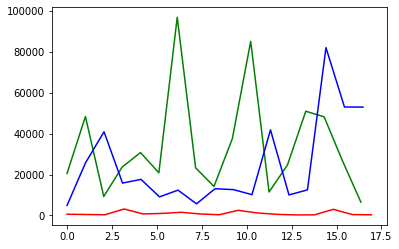

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')

plt.show()

In [ ]:

y1=df_pm16AD.loc[:,'potenza'].to_numpy()
y2=df_pm16MCI.loc[:,'potenza'].to_numpy()
y3=df_pm16HC.loc[:,'potenza'].to_numpy()



In [ ]:
x1 = np.linspace(0, len(y1),len(y1), endpoint=True)
x2 = np.linspace(0, len(y2),len(y2), endpoint=True)
x3 = np.linspace(0, len(y3),len(y3), endpoint=True)

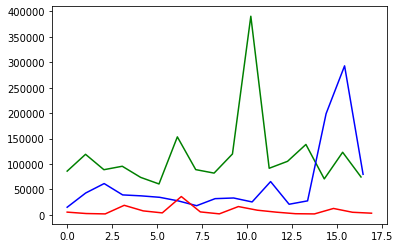

In [ ]:
plt.plot(x1, y1, 'g')
plt.plot(x2, y2, 'b')
plt.plot(x3, y3, 'r')

plt.show()

# Prove sulle tre classi AD,MCI e HC con 10-kfold 

## Preparazione dei dati frequenza di taglio a 7 HZ

In [ ]:
pmAD=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxAD_2_rc48x19.txt", sep="|",header=None)
pmMCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxMCI_2_rc37x19.txt", sep="|",header=None)
pmHC=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 7 HZ/Frq7_AbsDiff_PxxHC_2_rc20x19.txt", sep="|",header=None)

In [ ]:
pmAD.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2,16710.274386,491.826487,64883.355334,1.302347e+04,7035.999901,2584.586004,11037.942466,6386.799694,13757.095528,628.647278,16083.756395,84709.230856,20612.584788,1059.206620,123.334152,12152.299400,3922.639015,3923.191270,4888.347621
3,26001.170207,3549.454647,30864.681000,1.548235e+06,18787.870784,20950.704489,1024.154193,5005.654471,4143.589313,64958.443496,2678.570561,26905.955678,6418.752207,18760.705068,17757.939252,62873.778695,20549.576317,16318.303360,25023.776818
4,58.987504,22.993610,109.179982,1.249574e+02,1252.618400,1785.282194,14380.546589,920.462956,6773.058498,2274.558515,2862.266430,21.442147,1.426629,1311.841404,48.696497,20650.598312,170.095069,2586.197193,9.256284
5,12.783612,1.914625,151.477409,4.985188e+02,643.262941,41.071880,12.697732,4947.941699,89.516703,943.750703,292.242334,326.005754,84.511000,196.394138,3556.229706,2241.504110,389.791407,693.741442,1254.814396
6,278.462569,426.151941,5.410233,6.670465e+03,22.246485,4328.701283,550.050744,120.815338,753.259291,228.913540,33147.146694,1.231050,0.547352,72.362399,1.828590,37.303860,111.443217,8644.668808,90.799499


In [ ]:
pmAD = pmAD[(pmAD > 0).all(axis=1)]
pmMCI = pmMCI[(pmMCI > 0).all(axis=1)]
pmHC = pmHC[(pmHC > 0).all(axis=1)]

In [ ]:
df_pmAD=pmAD.assign(label=lambda pmAD: 1)
df_pmMCI=pmMCI.assign(label=lambda pmMCI: 2)
df_pmHC=pmHC.assign(label=lambda pmHC: 3)

In [ ]:
ADHC=df_pmAD.copy()
ADHC=ADHC.append(df_pmHC,ignore_index=True)

In [ ]:
ADMCI=df_pmAD.copy()
ADMCI=ADMCI.append(df_pmMCI,ignore_index=True)

In [ ]:
MCIHC=df_pmMCI.copy()
MCIHC=MCIHC.append(df_pmHC,ignore_index=True)

In [ ]:
CASEHC=df_pmAD.copy()
CASEHC=CASEHC.append(df_pmMCI,ignore_index=True)
CASEHC=CASEHC.append(df_pmHC,ignore_index=True)

## Riduzione di dimensioni con LDA a 7 HZ

### LDA

#### 10 RUN

In [ ]:
for i in range(10):
    df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = CASEHC.loc[:,'label']
    y = Y.to_numpy()
    #y = np.where(y == 3, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda4 = lda.fit_transform(X_train, y_train)
    #X_test_lda4 = lda.transform(X_test)
    X_test_lda4 = lda.fit_transform(X_test,y_test)

    X_train_caso5=X_train_lda4
    X_test_caso5=X_test_lda4
    y_train_caso5=y_train
    y_test_caso5=y_test
    tuning_albero_decisione(5,10)
    tuning_SVM(5,10)
    tuning_SVM_1(5,10)
    tuning_KNN(5,10)


#### Caso 5 AD vs MCI vs HC

In [ ]:

df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = CASEHC.loc[:,'label']
    y = Y.to_numpy()
    #y = np.where(y == 3, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda4 = lda.fit_transform(X_train, y_train)
    #X_test_lda4 = lda.transform(X_test)
    X_test_lda4 = lda.fit_transform(X_test,y_test)

    X_train_caso5=X_train_lda4
    X_test_caso5=X_test_lda4
    y_train_caso5=y_train
    y_test_caso5=y_test
    

In [ ]:
tuning_albero_decisione(5,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 1204 tasks      | elapsed:    1.4s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.571
{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.750
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.64      1.00      0.78         9
           2       1.00      0.86      0.92         7
           3       0.00      0.00      0.00         4

    accuracy                           0.75        20
   macro avg       0.55      0.62      0.57        20
weighted avg       0.64      0.75      0.68        20

[[9 0 0]
 [1 6 0]
 [4 0 0]]


[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_albero_decisione_CV(5,10)

In [ ]:
tuning_SVM(5,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.582
{'kernel': 'rbf', 'gamma': 0.01, 'C': 1.0}
Accuratezza con dati di Test: 0.800
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.69      1.00      0.82         9
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.56      0.67      0.61        20
weighted avg       0.66      0.80      0.72        20

[[9 0 0]
 [0 7 0]
 [4 0 0]]


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
tuning_SVM_1(5,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:    1.7s


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.582
{'C': 1.0, 'gamma': 0.01, 'kernel': 'rbf'}
Accuratezza con dati di Test: 0.800
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.69      1.00      0.82         9
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.56      0.67      0.61        20
weighted avg       0.66      0.80      0.72        20

[[9 0 0]
 [0 7 0]
 [4 0 0]]


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    2.3s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_SVM_CV(5,10)

<br>
<br>

In [ ]:
tuning_KNN(5,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.505
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}
Accuratezza con dati di Test: 0.800
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.69      1.00      0.82         9
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.56      0.67      0.61        20
weighted avg       0.66      0.80      0.72        20

[[9 0 0]
 [0 7 0]
 [4 0 0]]


[Parallel(n_jobs=-1)]: Done 150 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,10)

In [ ]:
#tuning_foresta(4,10)

## Preparazione dei dati frequenza di taglio a 16 HZ

In [ ]:
pmAD=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxAD_2_rc48x19.txt", sep="|",header=None)
pmMCI=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxMCI_2_rc37x19.txt", sep="|",header=None)
pmHC=pd.read_csv("/content/drive/MyDrive/Dati EEG/pazienti a 16 hz/Frq16_AbsDiff_PxxHC_2_rc20x19.txt", sep="|",header=None)

In [ ]:
pmAD = pmAD[(pmAD > 0).all(axis=1)]
pmMCI = pmMCI[(pmMCI > 0).all(axis=1)]
pmHC = pmHC[(pmHC > 0).all(axis=1)]

In [ ]:
df_pmAD=pmAD.assign(label=lambda pmAD: 1)
df_pmMCI=pmMCI.assign(label=lambda pmMCI: 2)
df_pmHC=pmHC.assign(label=lambda pmHC: 3)

In [ ]:
ADHC=df_pmAD.copy()
ADHC=ADHC.append(df_pmHC,ignore_index=True)

In [ ]:
ADMCI=df_pmAD.copy()
ADMCI=ADMCI.append(df_pmMCI,ignore_index=True)

In [ ]:
MCIHC=df_pmMCI.copy()
MCIHC=MCIHC.append(df_pmHC,ignore_index=True)

In [ ]:
CASEHC=df_pmAD.copy()
CASEHC=CASEHC.append(df_pmMCI,ignore_index=True)
CASEHC=CASEHC.append(df_pmHC,ignore_index=True)

In [ ]:
CASEHC.loc[:,18]

0     68779.781659
1     35276.323631
2     14373.366038
3      9046.952937
4      2006.775632
          ...     
94    11270.974247
95      304.189828
96     1152.498408
97      806.917847
98     1481.406641
Name: 18, Length: 99, dtype: float64

### 10 Run

In [ ]:
for i in range(10):
    df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

    X = df.to_numpy()

    Y = CASEHC.loc[:,'label']
    y = Y.to_numpy()
    #y = np.where(y == 3, 1, 0)
    #from sklearn.model_selection import train_test_split


    #X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
    lda = LDA(n_components=2)
    X_train_lda4 = lda.fit_transform(X_train, y_train)
    #X_test_lda4 = lda.transform(X_test)
    X_test_lda4 = lda.fit_transform(X_test,y_test)

    X_train_caso5=X_train_lda4
    X_test_caso5=X_test_lda4
    y_train_caso5=y_train
    y_test_caso5=y_test
    tuning_albero_decisione(5,10)
    tuning_SVM(5,10)
    tuning_SVM_1(5,10)
    tuning_KNN(5,10)

### Caso 5 AD vs MCI vs HC

In [ ]:

df=CASEHC.loc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

X = df.to_numpy()

Y = CASEHC.loc[:,'label']
y = Y.to_numpy()
#y = np.where(y == 3, 1, 0)
#from sklearn.model_selection import train_test_split


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y)
lda = LDA(n_components=2)
X_train_lda4 = lda.fit_transform(X_train, y_train)
#X_test_lda4 = lda.transform(X_test)
X_test_lda4 = lda.fit_transform(X_test,y_test)

X_train_caso5=X_train_lda4
X_test_caso5=X_test_lda4
y_train_caso5=y_train
y_test_caso5=y_test

In [ ]:
tuning_albero_decisione(5,10)

stimatore utilizzato - DecisionTreeClassifier
Fitting 10 folds for each of 216 candidates, totalling 2160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.711
{'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0}
Accuratezza con dati di Test: 0.800
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.69      1.00      0.82         9
           2       1.00      1.00      1.00         7
           3       0.00      0.00      0.00         4

    accuracy                           0.80        20
   macro avg       0.56      0.67      0.61        20
weighted avg       0.66      0.80      0.72        20

[[9 0 0]
 [0 7 0]
 [4 0 0]]


[Parallel(n_jobs=-1)]: Done 1951 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2160 out of 2160 | elapsed:    2.5s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#tuning_albero_decisione_CV(5,10)

In [ ]:
tuning_SVM(5,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 20 candidates, totalling 200 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.646
{'kernel': 'linear', 'gamma': 1.0, 'C': 1.0}
Accuratezza con dati di Test: 0.950
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20

[[9 0 0]
 [0 7 0]
 [1 0 3]]


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    0.4s finished


In [ ]:
tuning_SVM_1(5,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - Support vector machine (SVC)
Fitting 10 folds for each of 128 candidates, totalling 1280 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.646
{'C': 1.0, 'gamma': 0.0001, 'kernel': 'linear'}
Accuratezza con dati di Test: 0.950
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         7
           3       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.97      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20

[[9 0 0]
 [0 7 0]
 [1 0 3]]


[Parallel(n_jobs=-1)]: Done 1280 out of 1280 | elapsed:    3.5s finished


In [ ]:
#tuning_SVM_CV(5,10)

<br>
<br>

In [ ]:
tuning_KNN(5,10)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


stimatore utilizzato - KNeighborsClassifier
Fitting 10 folds for each of 16 candidates, totalling 160 fits
Accuratezza fase di Cross Validation con dati di Addestramento/Validazione: 0.648
{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Accuratezza con dati di Test: 0.950
Risultato sui dati di test:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         9
           2       0.88      1.00      0.93         7
           3       1.00      0.75      0.86         4

    accuracy                           0.95        20
   macro avg       0.96      0.92      0.93        20
weighted avg       0.96      0.95      0.95        20

[[9 0 0]
 [0 7 0]
 [0 1 3]]


[Parallel(n_jobs=-1)]: Done 151 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.4s finished


In [ ]:
#tuning_MP(4,10)

In [ ]:
#tuning_LR(4,10)

In [ ]:
#tuning_foresta(4,10)